In [1]:
import numpy as np
import tensorflow as tf

from data import create_data_gaussian, prepare_data_natural
from model import (
    simple_model,
    get_train,
    get_val,
    prepare_data_reweighter,
    prepare_data_refiner,
    apply_reweighter,
    apply_refiner,
    resample,
)
from plotting import plot_raw, plot_n_ratio, plot_w, plot_w2, plot_training

In [ ]:
output_dir = "results/gauss_hard/"
bins = np.arange(-3, 3.1, 0.1)

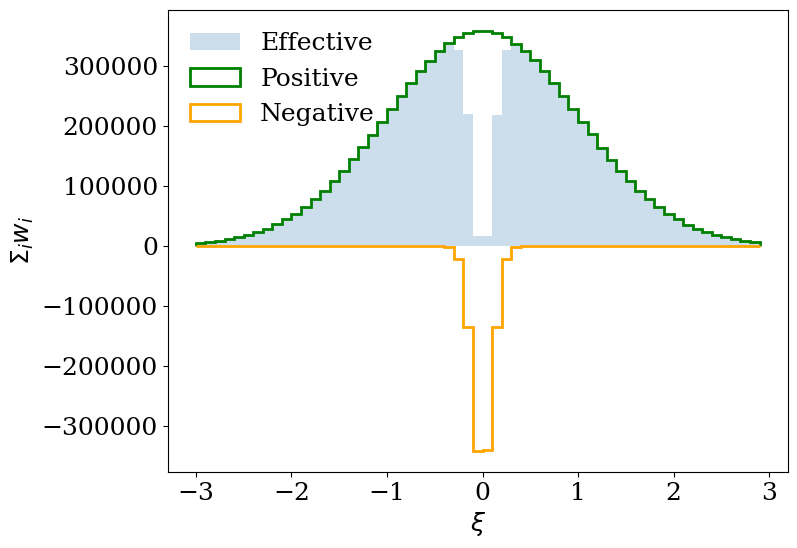

In [2]:
data = pos, neg, pos_weights, neg_weights = create_data_gaussian(10_000_000, neg_frac=0.1, neg_scale=0.1)
plot_raw(data=data, bins=bins, path=output_dir + "raw.pdf")

Epoch 1/5
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 39s 762us/step - accuracy: 0.5000 - loss: 0.4567 - val_accuracy: 0.4999 - val_loss: -1.1117
Epoch 2/5
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 38s 757us/step - accuracy: 0.5000 - loss: -3.9087 - val_accuracy: 0.5001 - val_loss: -15.2747
Epoch 3/5
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 40s 789us/step - accuracy: 0.5003 - loss: -27.5857 - val_accuracy: 0.5001 - val_loss: -53.8553
Epoch 4/5
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 40s 787us/step - accuracy: 0.5000 - loss: -80.9705 - val_accuracy: 0.5001 - val_loss: -132.6991
Epoch 5/5
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 41s 807us/step - accuracy: 0.5000 - loss: -180.1165 - val_accuracy: 0.5001 - val_loss: -266.0826


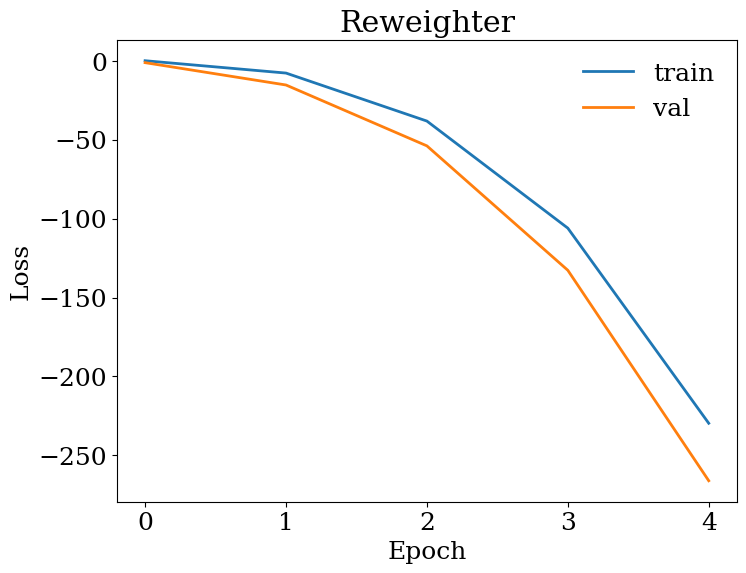

In [ ]:
reweighter = simple_model()
reweighter.compile(optimizer="rmsprop", loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), metrics=["accuracy"])
x_train, y_train, w_train, = get_train(*prepare_data_reweighter(*data))
history_reweighter = reweighter.fit(x_train, y_train, sample_weight=w_train, epochs=5, validation_split=0.2, batch_size=256)
plot_training(history_reweighter, title="Reweighter", path=output_dir + "training_reweighter.pdf")

Epoch 1/5
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 22s 884us/step - accuracy: 0.9017 - loss: 0.1736 - val_accuracy: 0.9017 - val_loss: 0.1703
Epoch 2/5
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 21s 846us/step - accuracy: 0.9021 - loss: 0.1704 - val_accuracy: 0.9026 - val_loss: 0.1699
Epoch 3/5
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 21s 824us/step - accuracy: 0.9022 - loss: 0.1703 - val_accuracy: 0.9027 - val_loss: 0.1698
Epoch 4/5
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 22s 858us/step - accuracy: 0.9021 - loss: 0.1704 - val_accuracy: 0.9026 - val_loss: 0.1699
Epoch 5/5
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 20s 796us/step - accuracy: 0.9022 - loss: 0.1703 - val_accuracy: 0.9027 - val_loss: 0.1700


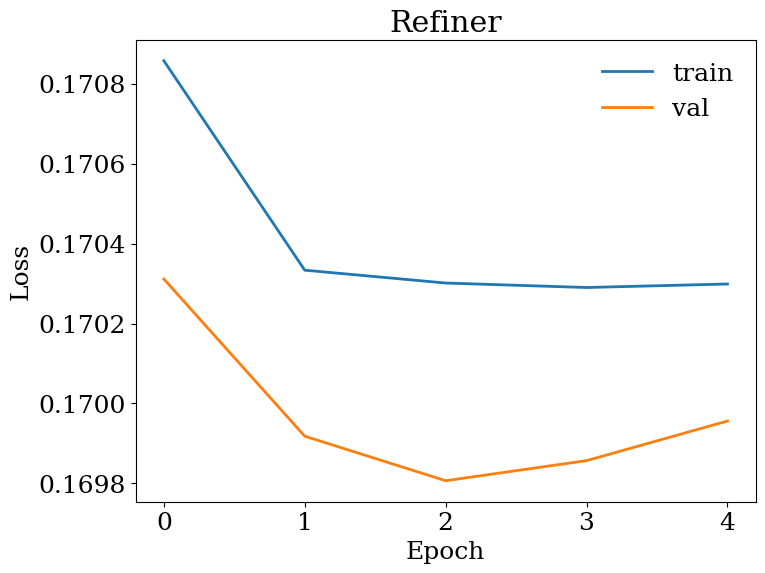

In [ ]:
refiner = simple_model()
refiner.compile(optimizer="rmsprop", loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), metrics=["accuracy"])
x_train, y_train, w_train = get_train(*prepare_data_refiner(*data))
history_refiner = refiner.fit(x_train, y_train, sample_weight=w_train, epochs=5, validation_split=0.2, batch_size=256)
plot_training(history_refiner, title="Refiner", path=output_dir + "training_refiner.pdf")

In [7]:
data_natural = get_val(*prepare_data_natural(*data))
data_reweighter = get_val(*apply_reweighter(*data, reweighter=reweighter))
data_refiner = get_val(*apply_refiner(*data, refiner=refiner))

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


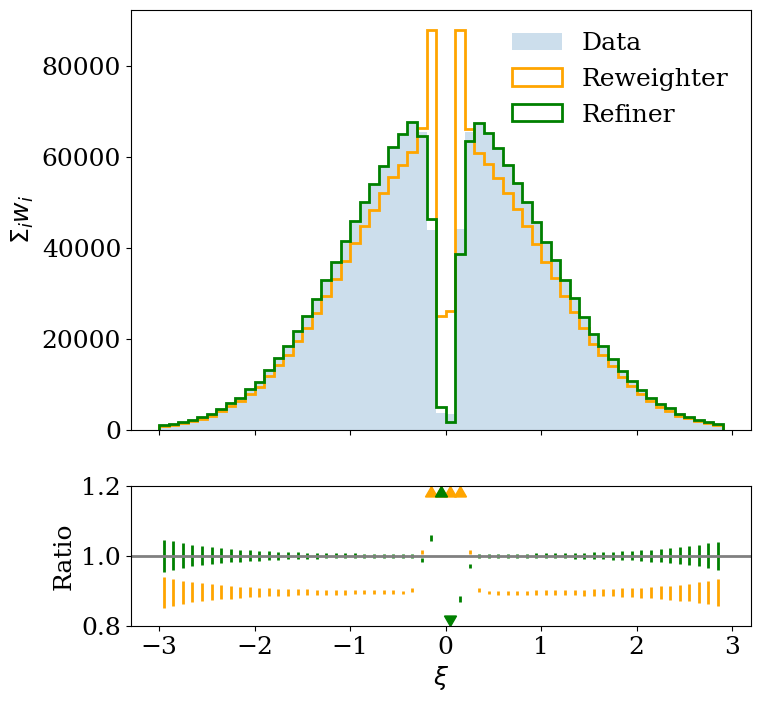

In [ ]:
plot_n_ratio(data=data_natural, reweighter=data_reweighter, refiner=data_refiner, bins=bins, path=output_dir + "counts.pdf")

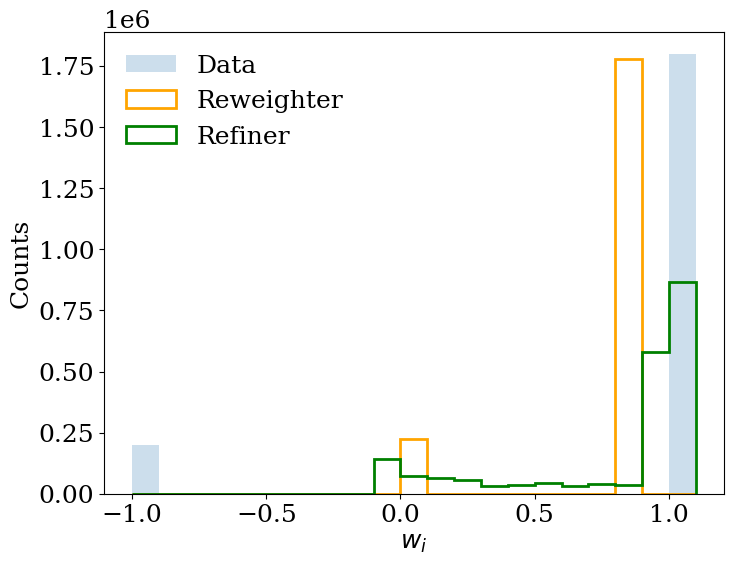

In [9]:
plot_w(data=data_natural, reweighter=data_reweighter, refiner=data_refiner, bins=np.arange(-1, 1.2, 0.1), path=output_dir + "weights.pdf")

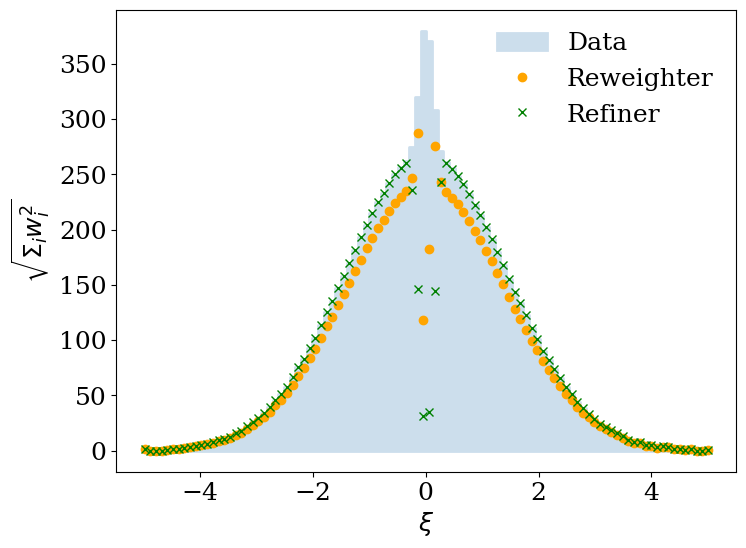

In [10]:
plot_w2(data=data_natural, reweighter=data_reweighter, refiner=data_refiner, bins=bins, path=output_dir + "variances.pdf")

In [11]:
data_reweighter_resampled = resample(*data_reweighter)
data_refiner_resampled = resample(*data_refiner)
len(data_reweighter_resampled[0]), len(data_refiner_resampled[0])

(1423392, 1528657)

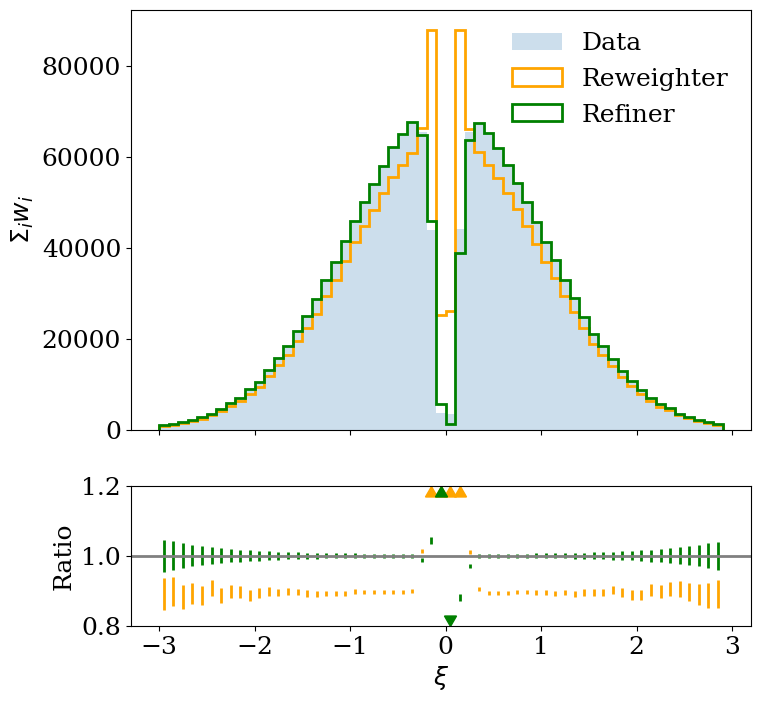

In [12]:
plot_n_ratio(data=data_natural, reweighter=data_reweighter_resampled, refiner=data_refiner_resampled, bins=bins, path=output_dir + "counts_resampled.pdf")

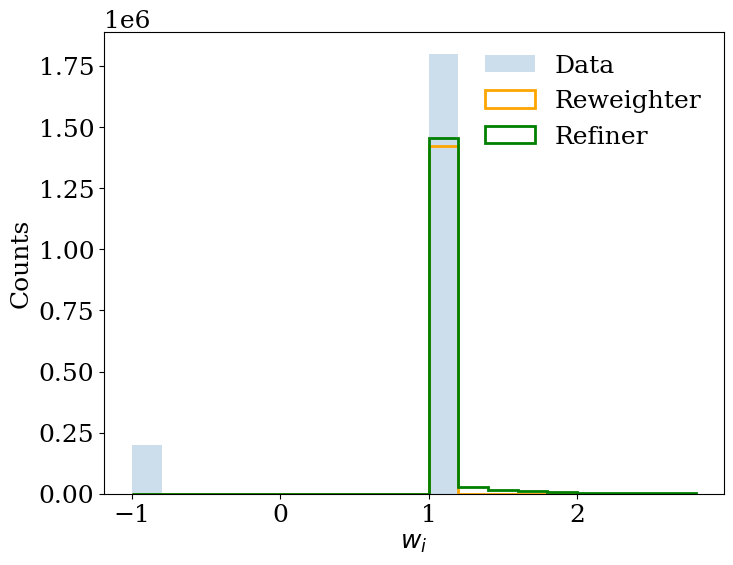

In [13]:
plot_w(data=data_natural, reweighter=data_reweighter_resampled, refiner=data_refiner_resampled, bins=np.arange(-1, 3.0, 0.2), path=output_dir + "weights_resampled.pdf")

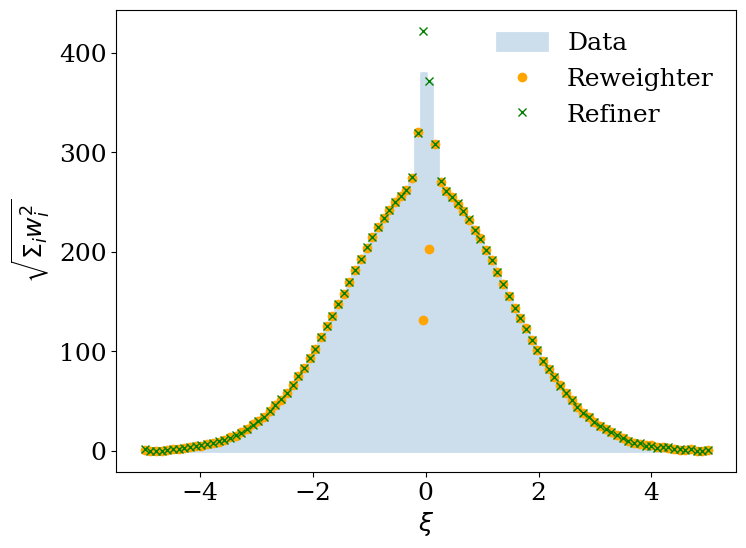

In [14]:
plot_w2(data=data_natural, reweighter=data_reweighter_resampled, refiner=data_refiner_resampled, bins=bins, path=output_dir + "variances_resampled.pdf")